In [2]:
import pandas as pd

player_dataset = pd.read_csv("./sources/fifa-23-player-dataset.csv", usecols=[
    "Best Position",
    "Height(in cm)",
    "Pace Total",
    "Shooting Total",
    "Passing Total",
    "Dribbling Total",
    "Defending Total",
    "Physicality Total",
    "Crossing",
    "Finishing",
    "Heading Accuracy",
    "Short Passing",
    "Volleys",
    "Dribbling",
    "Curve",
    "Freekick Accuracy",
    "Long Passing",
    "Ball Control",
    "Acceleration",
    "Sprint Speed",
    "Agility",
    "Reactions",
    "Balance",
    "Shot Power",
    "Jumping",
    "Stamina",
    "Strength",
    "Long Shots",
    "Aggression",
    "Interceptions",
    "Positioning",
    "Vision",
    "Penalties",
    "Composure",
    "Marking",
    "Standing Tackle",
    "Sliding Tackle",
    "Goalkeeper Diving",
    "Goalkeeper Handling",
    "Goalkeeper Kicking",
    "Goalkeeper Positioning",
    "Goalkeeper Reflexes",
])


In [3]:
player_dataset.head()

,Best Position,Height(in cm),Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,Goalkeeper Kicking,Goalkeeper Positioning,Goalkeeper Reflexes
0,CAM,169,81,89,90,94,34,64,84,90,...,75,96,20,35,24,6,11,15,14,8
1,CF,185,80,88,83,87,39,78,75,92,...,84,90,43,24,18,13,11,5,5,7
2,ST,185,75,91,79,86,44,83,71,94,...,90,88,35,42,19,15,6,12,8,10
3,CM,181,74,88,93,87,64,77,94,85,...,83,89,68,65,53,15,13,5,10,13
4,ST,182,97,89,80,92,36,76,78,93,...,80,88,26,34,32,13,5,7,11,6


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split_data = StratifiedShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=42).split(player_dataset, player_dataset["Best Position"])

for train_index, test_index in split_data:

    strat_train_set = player_dataset.iloc[train_index]
    strat_test_set = player_dataset.iloc[test_index]

strat_train_set["Best Position"].value_counts() / len(strat_train_set)


Best Position
CB     0.197675
ST     0.138629
CAM    0.123797
GK     0.112102
RM     0.077729
CDM    0.076018
CM     0.059902
RB     0.049490
LB     0.046424
LM     0.041931
RWB    0.022677
LWB    0.021607
RW     0.016473
LW     0.011624
CF     0.003922
Name: count, dtype: float64

In [5]:
test_data_copy = strat_test_set.copy()
strat_train_set.drop("Best Position", axis=1, inplace=True)
strat_test_set.drop("Best Position", axis=1, inplace=True)
# This is an unsupervised learning problem, so we don't need the labels

C:\Users\HP\AppData\Local\Temp\ipykernel_28912\2264279508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set.drop("Best Position", axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_28912\2264279508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_set.drop("Best Position", axis=1, inplace=True)


In [32]:
from sklearn.cluster import KMeans

# Grouping players into 4 clusters for starters
model = KMeans(n_clusters=4, random_state=42, n_init="auto", init="k-means++", max_iter=100, verbose=1)
model.fit_transform(strat_train_set)
points = model.fit_predict(strat_test_set)

Initialization complete
Iteration 0, inertia 78963580.0.
Iteration 1, inertia 48147845.65428704.
Iteration 2, inertia 46912772.69558489.
Iteration 3, inertia 46241174.69226535.
Iteration 4, inertia 45889522.72459165.
Iteration 5, inertia 45686188.78351872.
Iteration 6, inertia 45579316.0318078.
Iteration 7, inertia 45532202.34904853.
Iteration 8, inertia 45507428.81250458.
Iteration 9, inertia 45495502.81220398.
Iteration 10, inertia 45491692.664426155.
Iteration 11, inertia 45490745.651762694.
Iteration 12, inertia 45490213.68718264.
Iteration 13, inertia 45490079.70740996.
Converged at iteration 13: center shift 0.0029481394270878436 within tolerance 0.025526600961989887.
Initialization complete
Iteration 0, inertia 21795575.0.
Iteration 1, inertia 14068196.49970118.
Iteration 2, inertia 13869095.188535549.
Iteration 3, inertia 13817608.020886876.
Iteration 4, inertia 13739000.35562412.
Iteration 5, inertia 13556837.942536961.
Iteration 6, inertia 13147457.039300498.
Iteration 7, ine

array([[183.92736318,  62.4278607 ,  36.32039801,  49.41691542,
         53.22288557,  61.75522388,  67.39104478,  44.11542289,
         32.24875622,  58.92636816,  57.73532338,  31.69353234,
         49.65273632,  38.32238806,  34.44179104,  52.20099502,
         55.10049751,  61.54029851,  63.11442786,  56.99800995,
         58.71243781,  59.13233831,  46.55522388,  68.29552239,
         64.75621891,  70.13233831,  34.39303483,  63.439801  ,
         60.99004975,  40.20895522,  44.44776119,  40.01393035,
         54.34726368,  60.85970149,  63.83482587,  61.85671642,
         10.27363184,  10.32636816,  10.239801  ,  10.2039801 ,
         10.36716418],
       [188.46819338,  65.09160305,  63.11195929,  62.13486005,
         65.9821883 ,  35.51145038,  63.28244275,  13.78625954,
         10.6259542 ,  13.7302799 ,  27.57251908,  10.78371501,
         13.06361323,  14.13994911,  13.5394402 ,  26.54961832,
         19.17557252,  35.38931298,  35.72010178,  37.77862595,
         57.46055

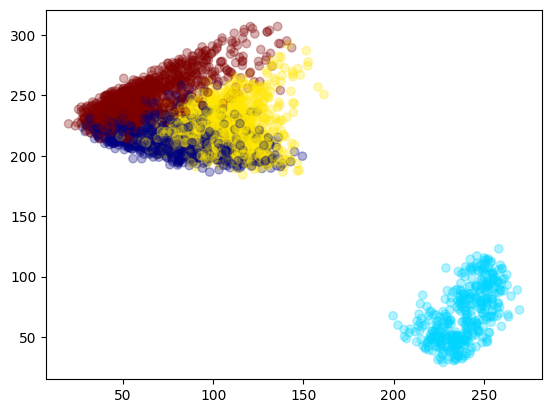

In [24]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1], c=model.labels_, cmap="jet", alpha=0.3)

# From the results we can see well defined clusters emerge
# There is some overlap between players them with few outliers

In [18]:
model.labels_

array([3, 1, 1, ..., 2, 3, 3])

In [19]:
s_model = KMeans(n_clusters=14, random_state=42, n_init="auto", init="k-means++", max_iter=100, verbose=1)
# Try clssify into 14 positions
points = s_model.fit_transform(strat_test_set)

Initialization complete
Iteration 0, inertia 11486848.0.
Iteration 1, inertia 7616723.659925829.
Iteration 2, inertia 7429479.142063909.
Iteration 3, inertia 7367965.355759941.
Iteration 4, inertia 7333342.492427183.
Iteration 5, inertia 7307074.1450753845.
Iteration 6, inertia 7289379.648802652.
Iteration 7, inertia 7275843.91613132.
Iteration 8, inertia 7269136.200527107.
Iteration 9, inertia 7265096.824242693.
Iteration 10, inertia 7260842.598399496.
Iteration 11, inertia 7257450.217512272.
Iteration 12, inertia 7255718.374532716.
Iteration 13, inertia 7253656.887905783.
Iteration 14, inertia 7250882.731082429.
Iteration 15, inertia 7248072.244512082.
Iteration 16, inertia 7246233.668932828.
Iteration 17, inertia 7245336.145588955.
Iteration 18, inertia 7244412.130474047.
Iteration 19, inertia 7243826.061625348.
Iteration 20, inertia 7243350.408879834.
Iteration 21, inertia 7243093.717187319.
Iteration 22, inertia 7242724.963866103.
Iteration 23, inertia 7241880.935335989.
Iteration

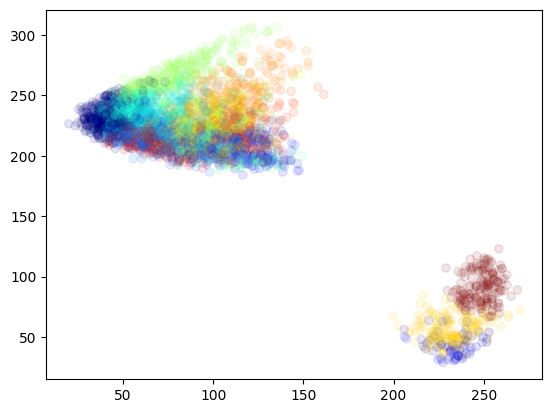

In [20]:
plt.scatter(points[:, 0], points[:, 1], c=s_model.labels_, cmap="jet", alpha=0.1)

C:\Users\HP\AppData\Local\Temp\ipykernel_28912\3183344769.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points[:, 0], points[:, 1], c=test_data_copy["Best Position"].map(position_color_map), cmap="jet", alpha=0.5)


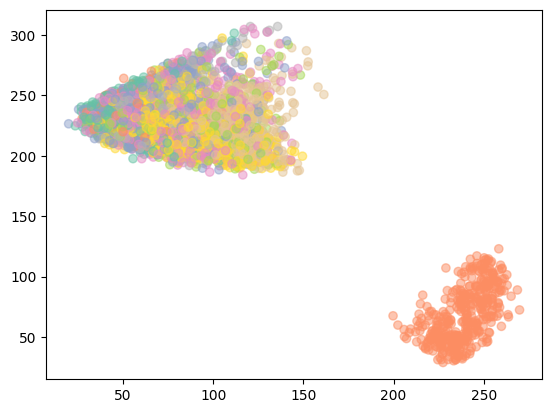

In [22]:
# We will now color the scatter plot using the actual positions of the players
import seaborn as sns

position_labels = test_data_copy["Best Position"].unique()
rgb_values = sns.color_palette("Set2", len(position_labels))
position_color_map = dict(zip(position_labels, rgb_values))

plt.scatter(points[:, 0], points[:, 1], c=test_data_copy["Best Position"].map(position_color_map), cmap="jet", alpha=0.5)